In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df = df.rename(columns={df.columns[19]: 'Rating'})
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# #Level 3
 

# Task 1
 Task: Predictive Modeling
 Build a regression model to predict the
 aggregate rating of a restaurant based on
 available features.
 Split the dataset into training and testing sets
 and evaluate the model's performance using
 appropriate metrics.
 Experiment with different algorithms (e.g.,
 linear regression, decision trees, random
 forest) and compare their performance

In [6]:


# One-hot encoding for categorical variables
categorical_cols = ['Has Table booking', 'Has Online delivery', 'Cuisines']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_data = one_hot_encoder.fit_transform(df[categorical_cols])

# Scale numerical variables
numerical_cols = ['Votes', 'Price range']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Concatenate the encoded and scaled data
preprocessed_data = np.concatenate((encoded_data, scaled_data), axis=1)

In [7]:


X = preprocessed_data
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:


# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

# Decision Trees
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Trees:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

Linear Regression:
MSE: 3.860842662210894e+20
R2: -1.6962468311703883e+20
Decision Trees:
MSE: 0.17684838952879406
R2: 0.9223023193169902
Random Forest:
MSE: 0.12271987795328029
R2: 0.9460834790971087


#  Task 2
    Task: Customer Preference Analysis
 Analyze the relationship between the type of
 cuisine and the restaurant's rating.
 Identify the most popular cuisines among
 customers based on the number of votes.
 Determine if there are any specific cuisines
 that tend to receive higher ratings

In [9]:
#Data Preparation
# Group the data by cuisine and calculate the average rating and number of votes
cuisine_analysis = df.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()

In [10]:
# Identify the most popular cuisines
# Sort the data by the number of votes in descending order
cuisine_analysis = cuisine_analysis.sort_values('Votes', ascending=False)

# Print the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_analysis.head(10))

Top 10 Most Popular Cuisines:
                            Cuisines  Aggregate rating  Votes
1514           North Indian, Mughlai          2.888623  53747
1306                    North Indian          1.672329  46241
1329           North Indian, Chinese          2.421722  42012
331                             Cafe          2.890970  30657
497                          Chinese          2.042090  21925
1520  North Indian, Mughlai, Chinese          2.568528  20115
828                        Fast Food          2.118362  17852
1699                    South Indian          2.370536  16433
1288           Mughlai, North Indian          2.091667  15275
1031                         Italian          3.657407  14799


In [11]:
#Determine if there are any specific cuisines that tend to receive higher ratings
# Sort the data by the average rating in descending order
cuisine_analysis = cuisine_analysis.sort_values('Aggregate rating', ascending=False)

# Print the top 10 cuisines with the highest average ratings
print("Top 10 Cuisines with the Highest Average Ratings:")
print(cuisine_analysis.head(10))

Top 10 Cuisines with the Highest Average Ratings:
                             Cuisines  Aggregate rating  Votes
13            American, BBQ, Sandwich               4.9   1252
1779                Sunda, Indonesian               4.9   5514
1062                    Italian, Deli               4.9   1424
93            American, Sandwich, Tea               4.9   1457
169          BBQ, Breakfast, Southern               4.9    249
1822                    World Cuisine               4.9     95
302           Burger, Bar Food, Steak               4.9   2238
796           European, Asian, Indian               4.9    621
37       American, Caribbean, Seafood               4.9    548
1214  Mexican, American, Healthy Food               4.9    223


# Task 3
Task: Data Visualization
 Create visualizations to represent the distribution
 of ratings using different charts (histogram, bar
 plot, etc.).
 Compare the average ratings of different cuisines
 or cities using appropriate visualizations.
 Visualize the relationship between various
 features and the target variable to gain insights

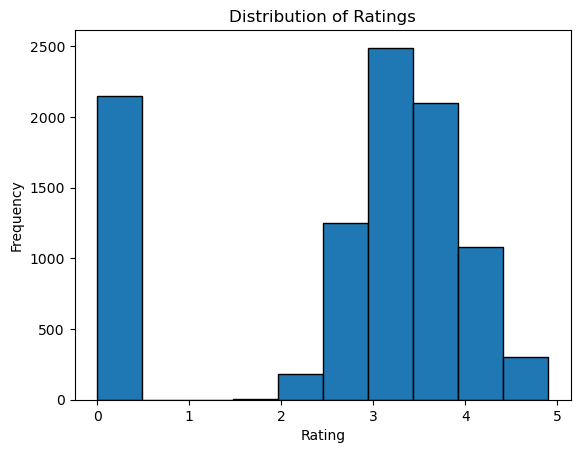

In [12]:
#Histogram of Ratings
plt.hist(df['Aggregate rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

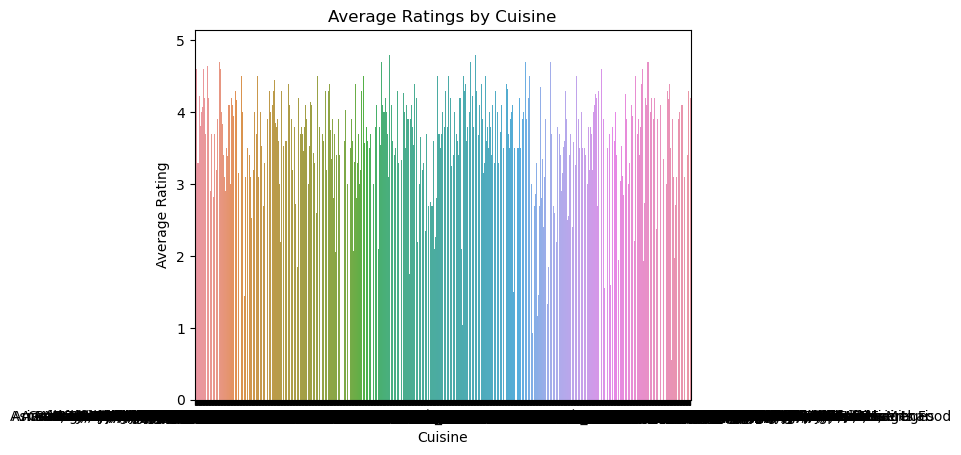

In [13]:
#Bar Plot of Average Ratings by Cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
sns.barplot(x='Cuisines', y='Aggregate rating', data=cuisine_ratings)
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Cuisine')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1).

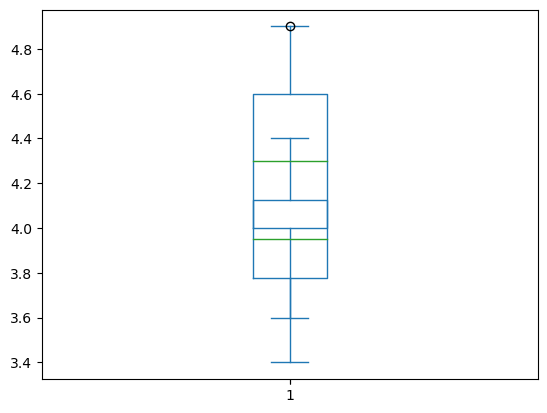

In [14]:
#Box Plot of Ratings by City
city_ratings = df.groupby('City')['Aggregate rating'].plot(kind='box')
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by City')
plt.show()

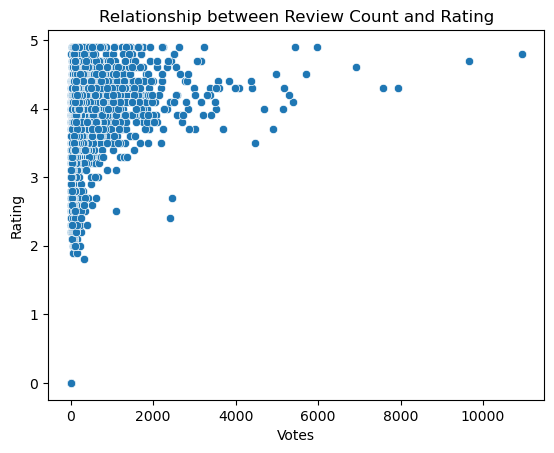

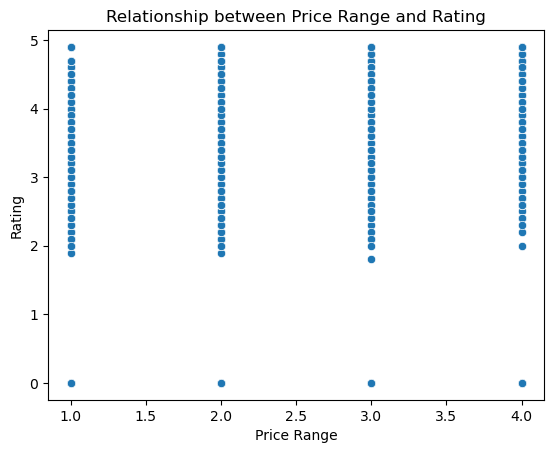

In [15]:
#Scatter Plot of Features vs. Target Variable
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relationship between Review Count and Rating')
plt.show()

sns.scatterplot(x='Price range', y='Aggregate rating', data=df)
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Relationship between Price Range and Rating')
plt.show()

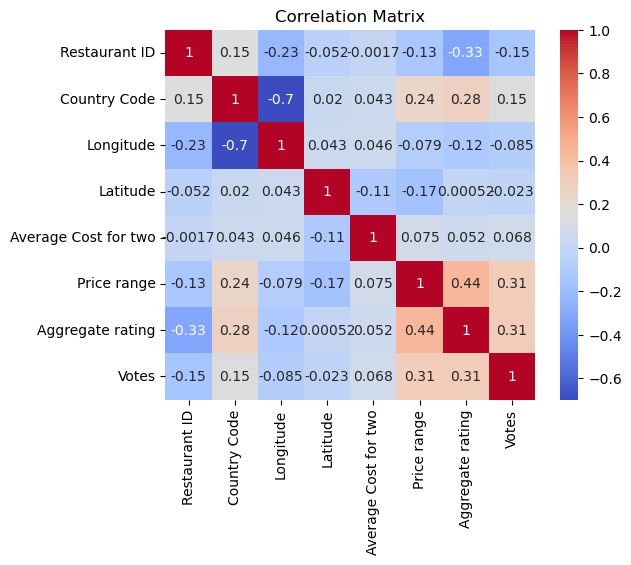

In [16]:
# Heatmap of Correlation Matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Thanking You 